# Electric Vehicle Population Data for Washington State

### Current registered EVs in the State of Washington according to Washington State Department of Licensing (DOL)


I chose to use a datset from data.gov that showed electric vehicles currently registered through the Washington State Department of Licensing. The data was pretty current, from June 2025, and I thought that it would provide some good insight into EV adoption in one of our states, with the ability to extrapolate and predict EV adoption in other states as well. EVs have come a long way in recent years in terms of the technology, range, affordability, and more. It is something to definitely keep an eye on as we enter the future.

You can find more information on the dataset here: [Data.gov](https://catalog.data.gov/dataset/electric-vehicle-population-data)

## <ins>Visualization Technique</ins>

<br></br>
<ins>Visualization Types Used</ins>

<li>Bar Plot
    <ul>
      This was the first and most basic plot I wanted to utilize to explore this dataset. These plots work really well with categorical data and can show accumulations of certain categories in the dataset. In this case, we see that we are given data surrounding the make, model, and year of the EVs. I wanted to track the amount of EVs we saw in the state of Washington as the years progressed to present day. This way we can see the trends of EV adoption over time. Since our dataset only goes back to the year 2000, we are not overwhelming our x axis with a lot of bars to plots. It would probably have been better if the data contained a column for "Year Registered" though. Sometimes, you can buy next year's model in advance potentially not giving the most accurate information on the amount of EVs registered in a current year. Although as you will see, we can still get a good glipmse of EV adoption over time. Instead of using raw counts, where we can see huge discrepancies between years, I chose to use a log scale to better exemplify magnitudes of change and show the true relative change over time.
    </ul>

</li>
<li>Jittered Dot Plot
    <ul>
     With the dot plot I wanted to expand and take a look at the cars themselves. In our dataset we are given more detailed information on these models that I thought would be of interest. Namely, the EV type and the range that you get while driving. The two EV types represented were ones that relied exclusively on a battery (BEVs) and hybrid vehicles which rely on both electricity and gasoline (PHEVs). I wanted to take a look at how a cars' range varied with the EV types and thought that a dot plot with jitter would show the distribution nicely, being that again we are looking at only two categories here. Dot Plots are able to show differences between two conditions while showing outlier data points and areas where data is tending to cluster. We added some jitter here to show around which ranges our data tends to cluster, without having similar data points get lost by being laid over each other.
    </ul>

</li>

<li>Heatmap
    <ul>
     A heatmap is able to show distinctions of correlation/frequency/counts of values pertaining to the intersection of two different variables really nicely using colors that vary from low units to high units. In this case, I thought it would be interesting to see what counties in Washington had a lot of EV adoption and further break it down by what automakers people were tending to buy/register. I had to provide extra data in the form of EV vehicle origin, so cars in the dataset were either originating from North America, Europ, or Asia (based on the headquarters location of the company, not necessarily where it was manufactured). In order for the heatmap to not get cluttered, I chose to only include the top 10 counties in Washington that had the most EVs registered in the dataset. In total there were almost 40 counties represented, and some of the counties had very low counts of EVs registered. The colors here represent the raw numbers of EVs in that specific county coming from the specific region, while also including the log scale as well (raw number followed by log scale in parentheses).
    </ul>

</li>

<li>Violin Plot
    <ul>
     Lastly, continuing with the EV origin comparison, I utilized a violin plot to compare the EV range to the vehicle origin to see if some regional companies placed more emphasis on making cars that can take you farther than others. A violin plot is a great visual tool for showing how spread out data is for a particular category and can also show where some of your data tends to cluster around. It combines the characteristics of a box and whisker plot while also showing density of data at certain values. 
    </ul>

</li>

<ins>Interactions and Story</ins>
<li>I feel the visualizations complement each other by showing different aspects and relationships of the data. We can see the number of EVs in the state over time as well as having it be broken down by county and vehicle origin. We can also get a glimpse of the EV ranges and how they differ based on manufacturer origin and EV type. This gives a sense of the trend of which car types people are buying, EV adoption as a whole, and which region is making the cars with the highest range. Interactivity was added in the form of a dropdown selection for EV origin and year range slider. The dropdown selection can be used to select one of the vehicle regional origins to compare vehicle counts across model years, as well as the EV types produced from that origin and their respective range. For the year range slider, we are able to finely tune our heatmap and violin plot for specific years of EV registration for certain counties and what model years each manufacturer origin had the best range. </li>

## <ins>Visualization Library</ins>

<br></br>
<ins>Getting started and Installation</ins>

Below you will find all of the imports/libraries that were used in building this dashboard. The main dashboard related libraries were HvPlot and Panel. 

HvPlot is an open source API that is available under a BSD license and is originally part of the HoloViz family libraries. It is developed and supported by Anaconda Inc. You can find the documentation here: [HvPlot](https://hvplot.holoviz.org/index.html)

Panel is also open source under BSD, part of HoloViz, and is maintained and developed by Anaconda Inc. You can find documentation here: [Panel](https://panel.holoviz.org/index.html)

To install HvPlot and Panel, it is best practice to initiate a virtual env for your project. This will create a space where all your libraries for your project can live and be encapsulated for importing and use within your project. To do this you can run the following command in your root directory of your project using your terminal. 

`python -m venv env`

Then make sure to activate the python environment shell. 

`source env/bin/activate`

Now, any packages you install will only be installed in this particular environment (your current project). Now we can install HvPlot and Panel according to the documentation:

`pip install panel`

`pip install hvplot`

<br></br>


<ins>Discussion on Benefits and Tradeoffs</ins>

The main decision to go with these libraries was the ease of use and having a declarative approach to creating plots and widgets.With HvPlot, we see a similarity to Pandas' native plotting API which helps in being able to hit the ground running so to speak. We are able to generate interactive plots that provide visualization tools that give a robust user experience. With Panel we can generate widgets that will allow us to interact and change our plots according to certain variables. This allows the relationships existing in our data to really come to life in ways other libraries might not be able to do. Both of these libraries integrate really well with Jupyter Notebook, and you can actually see your plots come to life in your notebook pages, or show them in a locally in a browser window.

However, it is important to note some drawbacks to using these libraries. If you utilize version control and keep your notebook in a repository like Github, your plots will not show up quite as expected in your remote repository. The interactive features involving the widgets will not be present, as well as the plot itself. In order for you to make your plots publicly available, you will have to take extra steps to create python scripts and deploy your project to a server. This can make things tricky when you want to share your work. Also, cost could become a looming factor if you are trying to render a lot of data or plots. While there are certainly many free cloud resources you can use, your use of the free tier could be quickly evaporated by your large application, resulting in you having to pay fees for storage and deployment. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import hvplot.pandas 
import holoviews as hv
from bokeh.models import LogTicker, FuncTickFormatter, FixedTicker, CustomJSTickFormatter
import panel as pn 

pn.extension()

## <ins>Demonstration</ins>

<br></br>
The first thing I started doing was just checking out the dataset and cleaning it up a little bit. I used pandas to convert the csv file into a dataframe.

In [2]:
df = pd.read_csv('./csv/Electric_Vehicle_Population_Data.csv')

Next I checked column types and wanted to see how many unique values are in some of these columns. I was be able to convert some of the columns to categories instead of strings/objects for better performance. Also, some of my columns conversions were for clarity and made more intuitive sense. As an example, I thought postal code made more sense as an Int rather than a float, even though it did not end up being used

In [3]:
## How I checked column types
df.dtypes

## Examples of how I checked for unique values to determine categories
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()
df['Electric Vehicle Type'].unique()
df['Make'].unique()
df['State'].unique()
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

## Leave one line above uncommented, while others are commented, in order to see different outputs below from running the cell


array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

Actual column conversion took place below

In [4]:
df['State'] = df['State'].astype('category')
df['Electric Vehicle Type'] = df['Electric Vehicle Type'].astype('category')
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].astype('category')
df['Postal Code'] = df['Postal Code'].astype('Int64')
df['Electric Range'] = df['Electric Range'].astype('Int64')
df['Legislative District'] = df['Legislative District'].astype('Int64')

Since I knew I wanted to take a look at vehicle origins. I manually created lists of the makes for each major continental region (North America, Asia, Europe). I ran a function on each row of my dataframe using the apply method of the dataframe. This allowed me to do a check of each car make using a custom function and see which list it is in. From there, I return the region and assign it to a new column, `EV Reional Origin`.

In [5]:
north_america = ['TESLA', 'JEEP', 'FORD', 'CHEVROLET', 'RIVIAN', 'CHRYSLER', 'CADILLAC', 'LINCOLN', 'DODGE', 'GMC', 'LUCID', 'FISKER', 'MULLEN AUTOMOTIVE INC.', 'BRIGHTDROP', 'RAM', 'AZURE DYNAMICS', 'WHEEGO ELECTRIC CARS']
asia = ['NISSAN', 'KIA', 'HYUNDAI', 'MAZDA', 'TOYOTA', 'SUBARU', 'LEXUS', 'HONDA', 'MITSUBISHI', 'ACURA', 'GENESIS', 'VINFAST']
europe = ['FIAT', 'AUDI', 'PORSCHE', 'BMW', 'POLESTAR', 'VOLVO', 'MINI', 'MERCEDES-BENZ', 'VOLKSWAGEN', 'ALFA ROMEO', 'SMART', 'JAGUAR', 'LAND ROVER', 'LAMBORGHINI', 'TH!NK', 'ROLLS-ROYCE', 'BENTLEY']
def region_check(car_make):
    if car_make in north_america:
        return 'North America'
    elif car_make in asia:
        return 'Asia'
    else:
        return 'Europe'


df['EV Regional Origin'] = df['Make'].apply(region_check)

## To check the new column now appears
# df.head()

### Bar Plot

Next, I started to create my plots. Since I was using Panel and HvPlot. I knew that defining functions that return my plots would be best practice, as then I could pass these functions in as arguments when creating my dasboard rows/columns. 

Below I created my function to return my bar plot comparing the number of registered vehicles in a particular Model year. As stated earlier, I chose to use a log scale on the y axis instead of the raw counts of the vehicles because some of the years had so little EVs registered, that they were barely visible on the graph. Using a log scale helps to see relative changes a lot cleaner versus the absolute changes in raw numbers. I made a note in the plot to signify the magnitude of the change as it might not be intuitive to see on first glance. 


In [6]:
def create_barplot(ev_origin):
    miny = 0
    maxy = df.groupby('Model Year')['VIN (1-10)'].count().sort_values(ascending=False).iloc[0]
    first_filter = df[df['EV Regional Origin'] == ev_origin] if ev_origin != 'All' else df
    filtered_df = first_filter.groupby('Model Year').agg({'VIN (1-10)':'count'})
    filtered_df.reset_index(inplace=True)
    filtered_df.rename(columns={'VIN (1-10)': 'Number of EVs'}, inplace=True)
    filtered_df.head()
    hv_bar_plot = filtered_df.hvplot.bar(x='Model Year', 
                                        y='Number of EVs', 
                                        C='Count', 
                                        cmap='BuPu', 
                                        xlabel='Model Year', 
                                        ylabel='Number of Registered EVs (Log Scale)', 
                                        title='Number of Registered EVs in WA Per Model Year',
                                        logy=True).opts(
                                            show_grid=True,
                                            xlim=(min(df['Model Year']) - 2, max(df['Model Year']) + 2),
                                            ylim=(2, maxy)
                                        )

    textbox = hv.Text(
        x=2001, y=120,
        text='*Unit increase in Y = 10× more EVs'
    ).opts(
        text_align='left',
        text_font_size='10pt',
        bgcolor='white'
    )

    return (hv_bar_plot * textbox)

A couple things of note here. Knowing that I wanted this plot to be interactive, I passed in this parameter of `ev_origin`. This was passed in from the selection of the widget dropdown that I created later. So every time the widget makes a selection, and this function is called again, we have to filter our dataframe (using boolean masking) for the proper EV Origin. I added an `All` selection as well, and if this is selected, we won't filter our dataframe.

To get the count of the number of vehicles in each model year, I had to group by the desired column and then aggregate the count of the vehicles in that model year. I counted the `VIN (1-10)` as these are unique identifiers of vehicles. When the new dataframe after this grouping and aggregation is returned, I assigned it to a new variable in order to reset the index and rename my column to something a little more meaningful `Number of EVs`. This is the actual filtered down dataframe I returned.

I added and subtracted 2 from the actual maximum and minimum of the `Model Year` just to better show the data points and not have them get cut off at the axes. It essentially gave some padding to that you can see all the data nicely.

Finally, just to enhance the information to the user, a textbox was added that signaled the magnitude of a change in the y axis. This was a separate object that was created and assigned to a variable. To overlay it on your plot, I used the `*` operator. 

### Jittered Dot Plot

Next, I moved on to the dot plot. I followed the same construction above by creating a function that would return my dot plot. I had to first make some adjustments to the data, starting out by only plotting cars with a range above 0. There were instances of cars in the dataset with a range of 0, and I do not believe it to be the case that they truly could not move at all! I believe that they were 0 because of lack of data on that particular vehicle, and I did not want these vehicles potentially skewing the plots. 

Since there would be potentially a lot of cars with or within the same range, I wanted to create a jitter in the plot, so as to reduce the amount of overlapping datapoints. This was done by converting the `Electric Vehicle Type` column into a category code. Essentially, since we were dealing with only two types, a new column was created denoting a numerical value corresponding to the EV type. The column was called `Electric Vehicle Type Code` and it was solely included in the new filtered dataframe. This new code column was used to create the jitter by adding a random value to the number from a normal distribution of mean 0 and standard deviation of 0.05. The sum of these two numbers was then stored in a new column called `Jitter`. This is the column that was actually used in the plot. What you would see without the jitter, was a straight line of dots in two places, 0 and 1, denoting again the categorical code translation. With the jitter, there will be small deviations horizontally in places that had the same range. 

In [ ]:
## Filtering for ranges above 0
violin__dot_df = df[df['Electric Range'] > 0]

## creating jitter
cats = violin__dot_df['Electric Vehicle Type'].astype('category').cat.categories

violin__dot_df['Electric Vehicle Type Code'] = violin__dot_df['Electric Vehicle Type'].astype('category').cat.codes

violin__dot_df['Jitter'] = violin__dot_df['Electric Vehicle Type Code'] + np.random.normal(0, 0.05, len(violin__dot_df))

Below is the creation of the function to create my jittered dot plot. As you can see, hvplot only has the ability to create a scatter plot, but the variables used in this plot are what make it turn into a dot plot for our two categories of choice (looking at the relationship between range and EV type). Are minimum and maximum y values were set at 5 less and more than what they actually minimum and maximum were just for visibility and so the data does not show as cut off at the axes. Again, we are filtering here based on our widget select dropdown selection of `EV Regional Origin`. We plot our `Jitter` on the X axis and have the data points grouped by the EV type. To ensure the X axis is labeled correctly. I used list comprehension on the `cats` variable above to label the x axis appropriately. 

In [8]:
miny = -5
maxy = violin__dot_df['Electric Range'].max() + 5

def create_dot_plot(ev_origin):
    first_filter_dot_plot = violin__dot_df[violin__dot_df['EV Regional Origin'] == ev_origin] if ev_origin != 'All' else violin__dot_df

    return first_filter_dot_plot.hvplot.scatter(x='Jitter', y='Electric Range', by='Electric Vehicle Type',
                                            width=600, height=600, legend=False).opts(
                                            xticks = [(i, cat) for i, cat in enumerate(cats)],
                                            xlabel = 'Electric Vehicle Type',
                                            ylabel = 'Electric Range (mi)',
                                            title='Range Comparison for Battery Electric and Plug-in Hybrid Vehicles'
                                            ).opts(
                                                ylim=(miny, maxy)
                                            )

### Heatmap

For the heatmap, I wanted to focus in on the counties of Washington, and specifically, did they have more foreign or domestic EVs registered. I only focused on the top 10 counties in Washington with the most EVs registered to keep the heatmap cleaner and easier to read. Outside of the top 10, other Washington counties had low numbers of EVs comparatively. See screenshot below of top 20 counties with the most EVs registered (39 Washington counties in total represented in the data)

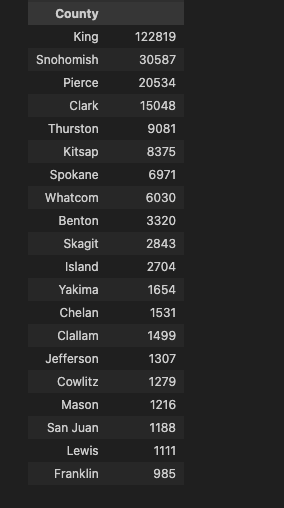




In [9]:
df_wa_counties = df[df['State'] == 'WA']
df_top_10_counties_ev_wa = df_wa_counties.groupby('County').agg({'VIN (1-10)':'count'}).nlargest(10, 'VIN (1-10)')
df_top_10_counties_ev_wa = df_top_10_counties_ev_wa.reset_index(inplace=False)

df_wa_counties_new = df_wa_counties[df_wa_counties['County'].isin(df_top_10_counties_ev_wa['County'])]

To create the heatmap, I first needed to generate a pivot table. To do this, I used the built in Pandas function `pivot_table`. I wanted to aggregate a count of all the vehicles in a county based on their regional origin. Any Nan values were filled in with zeroes so as to avoid errors in processing and plotting the data. 

One interesting error I ran into that I had to overcome was HvPlots inability to read my apparent wide formatted pivot table. In the wide format, my columns represented variables and each row was indexed according to the county. I needed to change this into a long format using the `.melt()` function in order to translate my pivot table into rows of observations. Putting it another way, instead of each column being one of my 3 regional origins, I had a single column for the regional origin, number of Evs, and county. A simple example can be seen below courtesy of this website: [Article detailing Wide vs Long Format Dataframe](https://stannomarjones.com/posts/long-vs-wide-data-format/)

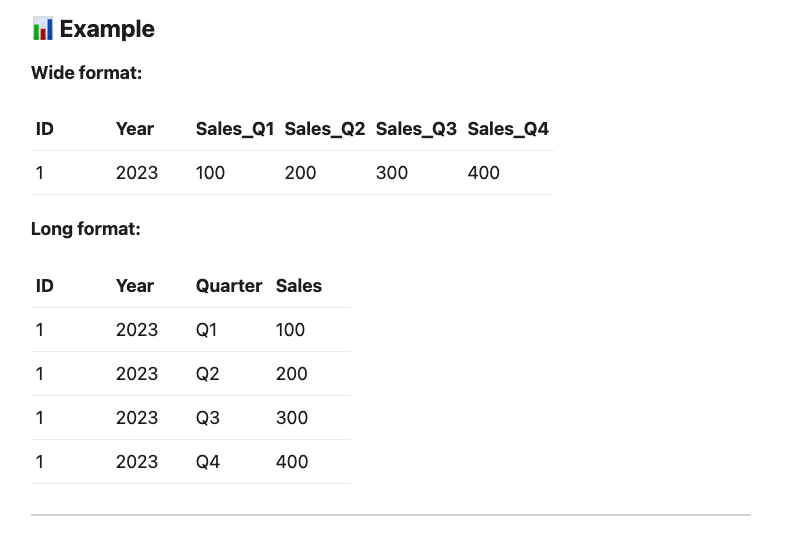



In [10]:
def create_heatmap(year_range):
    filtered_df_wa_counties = df_wa_counties_new[(df_wa_counties_new['Model Year'] >= year_range[0]) & (df_wa_counties_new['Model Year'] <= year_range[1])]
   

    heat_map_data = filtered_df_wa_counties.pivot_table(index="County", columns="EV Regional Origin", values='VIN (1-10)', aggfunc='count', fill_value=0, sort=False)

    heat_map_long = heat_map_data.reset_index().melt(
    id_vars='County',
    var_name='EV Regional Origin',
    value_name='Number of EVs Registered'
    )

    custom_ticks = [1000, 5000, 25000, 70000]

    fixed_ticker = FixedTicker(ticks=custom_ticks)

    custom_formatter_2 = CustomJSTickFormatter(code="""
    var log = Math.log10(tick);
    return tick.toLocaleString() + " (log₁₀=" + log.toFixed(1) + ")";
    """)

    return heat_map_long.hvplot.heatmap(x='EV Regional Origin', 
                                        y='County', 
                                        C='Number of EVs Registered', 
                                        cmap='BuPu', 
                                        xlabel='EV Car Model Origin', 
                                        ylabel='Washington State County', 
                                        title='Top 10 WA Counties: EVs Registered by Car Origin (Log Scale)',
                                        logz=True,
                                        colorbar=True).opts(
                                            colorbar_opts={'title': 'Raw Number of EVs (w/ Log Scale)', 'ticker': fixed_ticker, 'formatter': custom_formatter_2}
                                            
                                        )
    

Other things to note in the heatmap function are the use of a `CustomJSTickFormatter` courtesy of Bokeh: [Bokeh Example](https://docs.bokeh.org/en/dev-3.0/docs/examples/styling/plots/custom_js_tick_formatter.html)

This was utlized to better label our color bar on the side of the heatmap. The color bar key on the side used raw vehicle count numbers, but I also converted these number to the log scale and showed that as well for users to compare. The lines within the `code` parameter is actually Javascript that Bokeh can use to run and compute the math while in the browser.

For this plot, we will be adding interactivity in the form of a slider to change the range of years. This `year_range` parameter actually can be unpacked like a tuple using indexing. We can filter for our model years from there. 

## Violin Plot

We finally arrive at the Violin Plot. For this one I wanted to take a look at the range some of the EV models get and compare it across their regional origins. We can see which regional EV companies produce cars that can drive the farthest on a single charge, and with our widget, see how the ranges on these cars have changed over time. I noticed that the North American vehicles have some high ranges but found that this might be skewed because of one Make: Tesla. As you can see from the screenshot below, Tesla's has the high average electric range of any makes in the dataset, with "0" ranges removed.

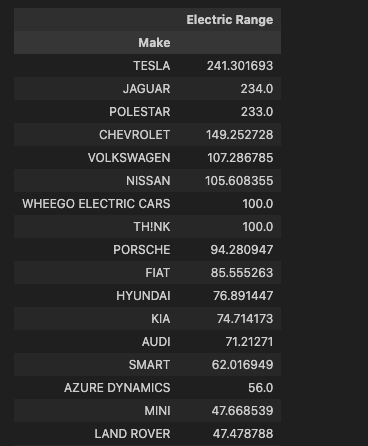

In [11]:
def create_violin_plot(year_range):

    filtered_violin_df = violin__dot_df[(violin__dot_df['Model Year'] >= year_range[0]) & (violin__dot_df['Model Year'] <= year_range[1])]

    return filtered_violin_df.hvplot.violin(y='Electric Range', by='EV Regional Origin', ylabel='Electric Range (mi)',
                 cmap=['red', 'silver', 'blue'], legend=False, color='EV Regional Origin',
                 width=600, height=600, padding=0.4).opts(
                     ylim=(-25, 400),
                     title='Distribution of Electric Range Distances Grouped by EV Origin Region'
                 )

As you can see, I did the same `year_range` filtering as the heatmap above before retuning the plot. Also of note, I used the same dataframe, `violin__dot_df`, as above which has only rows where the electric range is above 0. 

## Dashboard

<ins>Widgets</ins>

I wanted to include two widgets to help make the plots more interactive. The widgets control multiple plots, with the select dropdown updating the bar and jittered dot plot, while the rangle slider controls the heatmap and violin plot. They were created using widgets from the Panel library. You can see the customization in the parameters passed in below

In [12]:
select_var_ev_origin = pn.widgets.Select(
    options=[x for x in df['EV Regional Origin'].unique()] + ['All'],                   
    value='All',                   
    description='Choose which Regional HQ Location You would like to focus on'
)


year_range_slider = pn.widgets.RangeSlider(
    start=df['Model Year'].min(),
    end=df['Model Year'].max(),
    value=(df['Model Year'].min(), df['Model Year'].max()),
    step=1
)

From here, we need to bind these widgets to our respective plots. Again, we can use Panel to facilitate this for us by using the pn.bind function and passing in our function that returns our respective plot, and the widget we want tied to that plot. Notice how we have to match the parameter to the parameter that is declared in each `create_plot` function. This is so each function can properly get the values from the wdiget passed into it from our interaction. Ex: `pn.bind(create_barplot, ev_origin=select_var_ev_origin)` contains `ev_origin` and the `create_barplot` function has the same parameter name.

In [13]:
interactive_bar_plot = pn.bind(create_barplot, ev_origin=select_var_ev_origin)
interactive_dot = pn.bind(create_dot_plot, ev_origin=select_var_ev_origin)
interactive_heatmap = pn.bind(create_heatmap, year_range=year_range_slider)
interactive_violin = pn.bind(create_violin_plot, year_range=year_range_slider)

Lets finally create our dashboard using our variables assigned above. We can use panel to create rows and column for our dashboard and nest them inside each other. Since in this case, I had 4 plots, and 2 widgets that controled 2 plots each, I wanted to keep the plots controlled by the same widget in the same row. The widget would then be in the row right above it, so as to signal that this particular widget controls these 2 plots, and so on. 

To run the dashboard locally, you could uncomment the line `dashboard_final.servable()` below and take it for a spin! Don't forget it is also available on the cloud at: [HuggingFace](https://huggingface.co/spaces/ccthatsme/521_assignment3)

In [16]:
dashboard_final = pn.Column(
    pn.pane.Markdown("<h1 style='font-size:4em; color: black'>Electric Vehicle Registration data for the State of Washington</h1>"),
    pn.pane.Markdown("<h3 style='font-size:1.5em; color: black'>Use the following dropdown to filter for EV Model Origin in the 2 plots below</h3>"),
    pn.Row(select_var_ev_origin),
    pn.Row(interactive_bar_plot, interactive_dot),
    pn.pane.Markdown("<h3 style='font-size:1.5em; color: black'>Use the following slider to filter for EV Model Years in the 2 plots below</h3>"),
    pn.Row(year_range_slider),
    pn.Row(interactive_heatmap, interactive_violin)
)

#dashboard_final.servable()